# Object Detection with Homography


[[[178  15]]

 [[176 157]]

 [[341 157]]

 [[341  12]]]


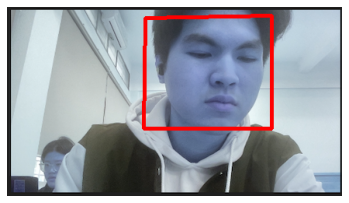

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

object_img = cv2.imread('/content/object.png')
detected_img = cv2.imread('/content/gốc.png')
# Biến ảnh thành gray scale
ref_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)
detected_gray = cv2.cvtColor(detected_img, cv2.COLOR_BGR2GRAY)

# Tìm keypoints và  descriptors 
sift = cv2.xfeatures2d.SIFT_create()
ref_kp, ref_des = sift.detectAndCompute(ref_gray, None)
detected_kp, detected_des = sift.detectAndCompute(detected_gray, None)

# Tiến hành match các descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(ref_des, detected_des, k=2)
# Trả ra khoảng cách,và queryIdx và trainIdx, cung cấp các chỉ số của  trong hình ảnh tham chiếu và hình ảnh được phát hiện tương ứng.

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good_matches.append(m)

# ref_kp[m.queryIdx].pt được sử dụng để trích xuất tọa độ của điểm chính trong hình ảnh được phát hiện tương ứng với kết quả trùng khớp.
ref_pts = np.float32([ref_kp[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
# detect_kp[m.trainIdx].pt được sử dụng để trích xuất tọa độ của điểm chính trong hình ảnh được phát hiện tương ứng với kết quả trùng khớp.
detected_pts = np.float32([detected_kp[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# findHomography giúp tìm ra phép biến đổi giữa 2 ảnh
M, mask = cv2.findHomography(ref_pts, detected_pts, cv2.RANSAC,5)
# Lấy các điểm 4 góc 
h, w = object_img.shape[0],object_img.shape[1]
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)

# Thực hiện Biến đổi phối cảnh
dst = cv2.perspectiveTransform(pts, M)

# Vẽ bounding box 
homography = cv2.polylines(detected_img, [np.int32(dst)], True, (255, 0, 0), 3)
print(np.int32(dst))
# showing ảnh
plt.axis("off")
plt.imshow(homography)




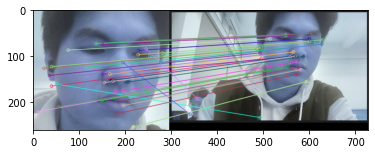

(<matplotlib.image.AxesImage at 0x7f8f43654730>, None)

In [ ]:
img3 = cv2.drawMatchesKnn(object_img,ref_kp,detected_img,detected_kp,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()